# 可視化
## 前回行ったこと
 - 多層パーセプトロン`MLPRegressor`の学習
 - `sklearn.preprocessing`のクラスを用いたスケーリング

## 今回行うこと

- データを可視化して，データ・問題そのものを理解する
- 可視化を行い前処理に活かす
- チューニング結果を可視化して次のチューニングに活かす

## （復習）データの読み込み
いつものようにデータの読み込みを行います．
ただし，特徴ベクトルはまだ作りません．

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor

# Colabの場合は以下のコメントアウト外す
#from google.colab import drive
#drive.mount('/content/drive') # google driveをマウント（＝Colabから使えるようにする）

d_train = pd.read_csv("data/train.csv") # 訓練データを読み込む
d_test = pd.read_csv("data/test.csv") # テストデータを読み込む
# Google Colabの場合
#d_train = pd.read_csv("drive/My Drive/data/train.csv") # 訓練データを読み込む．
#d_test = pd.read_csv("drive/My Drive/data/test.csv") # テストデータを読み込む．

print("訓練データとテストデータの数を取得")
n_train = len(d_train)
n_test = len(d_test)
print(f"訓練データ数：{n_train}，テストデータ数：{n_test}")

訓練データとテストデータの数を取得
訓練データ数：12774，テストデータ数：5475


前回まではこのタイミングで特徴ベクトルを作っていましたが，今回はまだ行いません．
しかし，後ほど行うので，特徴ベクトル作成のための関数をここで作っておきます．
以下の`day3_onehot_encoding`は，訓練データとテストデータの`DataFrame`を渡すと，訓練データ，テストデータ，そして訓練データのラベルを返します．
したがって，

`X_train, X_test, y_train = day3_onehot_encoding(d_train, d_test)`

とすると，これまで用いてきた特徴ベクトルやラベルと同じものが得られます．
この関数を使う場合，訓練データの`DataFrame`から"AveragePrice"の列を`pop`しないでおいてください．
また，この関数では"AveragePrice"を`pop`しないので，この関数を用いても，この関数に渡された`d_train`に変化はありません．
なぜこのようにしたかというと，`DataFrame`の状態で何らかの分析をする際，"AveragePrice"の列が取り除かれていないほうが都合が良いことが多いだろうと判断したからです．

In [2]:
def day3_onehot_encoding(d_train, d_test, columns_cat=["Date", "type", "region"]):
    n_train = len(d_train)
    n_test = len(d_test)
    y_train = d_train["AveragePrice"]
    # one-hot encoding
    cols_feature = d_test.columns 
    d_train_test = pd.concat([d_train[cols_feature], d_test], axis=0) # 訓練とテストを連結

    d_train_test_onehot = pd.get_dummies(d_train_test, columns=columns_cat) # get_dummiesを使ってone-hotエンコーディング
    d_train_onehot = d_train_test_onehot[:n_train] # d_train_test_onehotの訓練データ部分
    d_test_onehot = d_train_test_onehot[n_train:] # d_train_test_onehotのテストデータ部分
    X_train = d_train_onehot.values # np.arrayに変換
    X_test = d_test_onehot.values  # np.arrayに変換
    return X_train, X_test, y_train

## データの分析
前回までの内容で，予測モデルを提出するまでの大まかな流れを最低限追えたかと思います．
コンペティションにおいては「できるだけ高い予測スコア（＝低い予測誤差）を出すこと」が最重要視されますが，データや問題の性質について知識を得たい・説明をしなければならない，すなわち単に予測モデルを作るのではなく**データの分析**をしたい・しなければならないことも多いでしょう．
また，データに関する分析結果が優れた予測モデルを構築するのに役に立つとも考えられます．
そして，データの分析を行う際，**可視化**が非常に役に立ちます．
単なる数字の列を眺めてそこから傾向や性質を見出すことは難しいですが，図に落とし込むことで傾向や性質がわかりやすくなります（もしコンピュータの方がいらっしゃいましたらすみません）．

Pythonには可視化のためのライブラリは多数存在します．
最近出てきたライブラリはより洗練されたものが多いですが，ここでは，`matplotlib`というライブラリを使います．
また，`matplotlib`でプロットをする際にも色々方法がありますが，今回は最もシンプルな方法で行います．
以下の２つのコマンドを打つと`matplotlib`を使えるようになり，さらにセル内に表示することができるようになります．

In [3]:
# jupyter lab/notebookの時のコマンド．デフォルトで設定されている可能性アリ
%matplotlib inline
import matplotlib.pyplot as plt

## "AveragePrice"のヒストグラムの作成
まずはわかりやすく簡単なところからやってみます．
コンペのタスクは「アボカドの値段の推定」でした．
そこで，「アボカドの値段」に関するグラフを作ってみます．
ここでは「訓練データにおける値段のヒストグラム」を作ってみます．
「値段のヒストグラム」では，横軸が値段を，縦軸がその値段の観測数（その値段のデータの数）を表します．
ヒストグラムを作る際は**ビンの数**を指定する必要があります．
ここではひとまず`50`としてみます．
`plt.hist`の最初の引数にデータを，次の引数に便の数を指定します．
詳しくは[ドキュメント](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html)を参照してください．

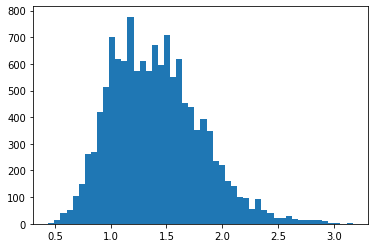

In [4]:
plt.hist(d_train["AveragePrice"], 50)
# jupyter notebook/labでinline表示をする場合なくてもよい
# .pyファイルを動かして表示する場合は必要．また， 一度グラフをリフレッシュしたい場合は打つこと
plt.show() 

でてきました．
ちなみに，以下のようにpandasの機能を使っても作成することができます．

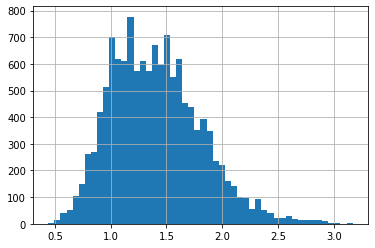

In [5]:
d_train["AveragePrice"].hist(bins=50)
plt.show()

`plt.show()`を実行することでグラフが表示され，グラフがリフレッシュされます．
`plt.show()`を実行するまでに`plt.hist`やその他のプロットを作成するコマンドを複数回実行すると，複数のグラフが一つの図にまとめられます．
jupyter lab（Notebook）では，`plt.show()`を実行せずとも，`%matplotlib inline`を一度実行しておけば，セルの最後まで行った段階でグラフが表示・リフレッシュされます．

さて，なんとなく正規分布のように頂点（峰）が一つ（単峰性といいます）を想像したかもしれません．
しかし，このヒストグラムは1.1周辺と1.5周辺の**二箇所に峰**があるようにも見えます．
「そういうものなんだ」と思うのも良いですが，ここではもう少し踏み込んでみましょう．
このアボカドデータには"type"という属性があり，アボカドは"organic"か"conventional"かの２つに分けられるのでした．
直観的には，"organic"のアボカドは"conventional"のアボカドよりも高価であるように思います．
そこで，"organic"と"conventional"で分けてヒストグラムを作成してみます．
最近はあまりpandasの`DataFrame`の操作をしていなかったので，復習も兼ねてQuizです．

### Quiz 1
訓練データの`DataFrame`である`d_train`から，"type"が"organic"であるデータだけを取り出した`d_train_organic`と，"conventional"であるデータだけを取り出した`d_train_conventional`を作成してください．

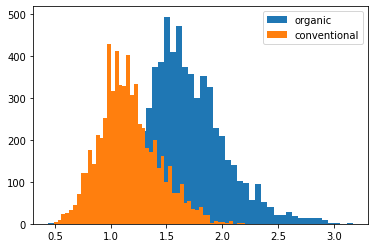

In [6]:
d_train_organic =  # ここを埋める
d_train_conventional = # ここを埋める

# 値段を取り出す
price_organic = d_train_organic["AveragePrice"]
price_conventional = d_train_conventional["AveragePrice"]

# ヒストグラムを作成
plt.hist(price_organic, bins=50, label="organic") # 凡例をつける
plt.hist(price_conventional, bins=50, label="conventional") # 凡例をつける
plt.legend() # 凡例を表示
plt.show() # グラフを表示

"organic"と"conventional"で分けてヒストグラムを見たところ，わかりやすく違いが出ていますね．
先程のヒストグラムにおける値段の低い方（=左側）の峰は"conventional"によるもので，値段の高い方（=右側）の峰は"organic"によるものでした．
予想通り，"organic"の方が全体的に値段が高いものが多いように見えますね．
このヒストグラムをファイルに保存してみましょう．
`plt.show`を実行する前に，`plt.savefig`を実行することで保存できます．

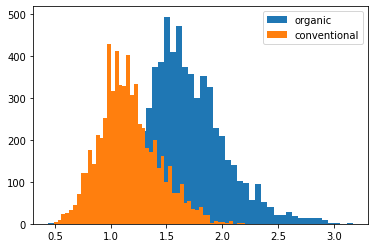

In [7]:
plt.hist(price_organic, bins=50, label="organic") # 凡例をつける
plt.hist(price_conventional, bins=50, label="conventional") # 凡例をつける
plt.legend() # 凡例を表示
plt.savefig("hist_average_price.pdf") # 名前をつけて保存
plt.show() # グラフを表示

ヒストグラムにすることで非常にわかりやすくなりましたが，一方で，細かいことはわからなくなってしまいました．
元のデータを眺めるのが最も情報の量は多いですが，1万を超えるデータの値段を眺めるのは辛いです．
このようなときは平均や標準偏差，最大値や最小値と言ったいくつかの**統計量**を計算し，それを観察すると良いでしょう．
pandasはやはり非常に気が利いていて，`describe`メソッドで`DataFrame`の各列のいくつかの統計量を計算できます．
`d_train_organic`と`d_train_conventional`に対して`describe`を使ってみましょう．

In [8]:
print("organicの統計量")
print(d_train_organic.describe())
print()
print("conventionalの統計量")
print(d_train_conventional.describe())

organicの統計量
                4046           4225          4770     Small Bags  \
count    6402.000000    6402.000000   6402.000000    6402.000000   
mean     7158.197976   14955.369516    257.227727   16591.990089   
std     23023.016277   43446.792160   1050.752545   57009.645028   
min         0.000000       0.000000      0.000000       0.000000   
25%       161.447500     671.165000      0.000000     762.917500   
50%       908.830000    3106.230000      0.000000    2880.405000   
75%      4293.570000    9998.735000     30.280000    9770.885000   
max    361996.840000  484383.870000  22276.600000  944572.500000   

          Large Bags  XLarge Bags  AveragePrice  
count    6402.000000  6402.000000   6402.000000  
mean     6803.723091     1.116261      1.654980  
std     23955.174644    13.787362      0.363834  
min         0.000000     0.000000      0.440000  
25%         5.217500     0.000000      1.420000  
50%       390.240000     0.000000      1.620000  
75%      2976.640000     

色々出てきました．
`mean`は平均値，`std`は標準偏差，`25, 50, 75%`等は四分位数ですね．`min`と`max`は最小値と最大値です．
他の列の値も出ていてちょっと比較しづらいので，"AveragePrice"の情報だけを見てみます．
以下のように，`describe()`の結果に対して角括弧で列名を指定することで，特定の列の情報だけを取り出せます．

In [9]:
print(d_train_organic.describe()["AveragePrice"])
print(d_train_conventional.describe()["AveragePrice"])

count    6402.000000
mean        1.654980
std         0.363834
min         0.440000
25%         1.420000
50%         1.620000
75%         1.860000
max         3.170000
Name: AveragePrice, dtype: float64
count    6372.000000
mean        1.157001
std         0.262109
min         0.490000
25%         0.980000
50%         1.130000
75%         1.320000
max         2.200000
Name: AveragePrice, dtype: float64


上の結果によると，訓練データにおける"organic"の値段の平均はおよそ1.65，"conventional"の平均は1.16のようです．
また，標準偏差は0.36と0.26で，"orgaic"の方が値段のばらつきが大きいようです．
最大値については，"organic"が3.17に対し，"conventional"では2.20のようです．

## 売れた個数のヒストグラムとスケーリング
練習がてら，値段についてのヒストグラムを作ってみましたが，あの程度であれば恩恵を感じづらいかもしれません．
平均と標準偏差，最小値と最大値くらいの情報で十分なようにも感じます．

そこで次は，小，大，特大の各サイズ（およびそのサイズの袋）で売れた個数（数値情報の列）について可視化します．
そしてその結果から，特徴量のスケーリングについて考えてみます．

以下のセルでは，小，大，特大のサイズで売れた数，及びその袋として売れた数について別々にヒストグラムを作成しています．
また，先程のように，"organic"と"conventional"で分けてヒストグラムを作ります．
グラフが合計6つ，縦に並んで表示されるため，少し見づらいかもしれません．

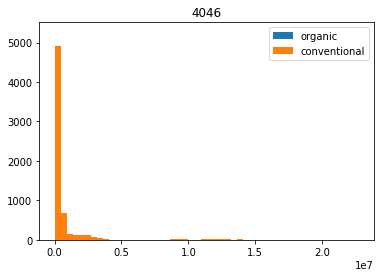

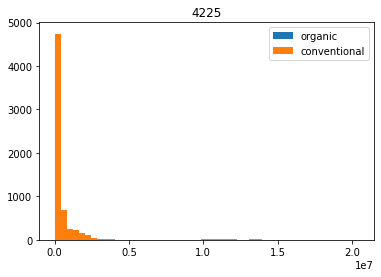

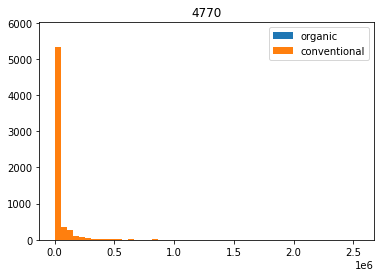

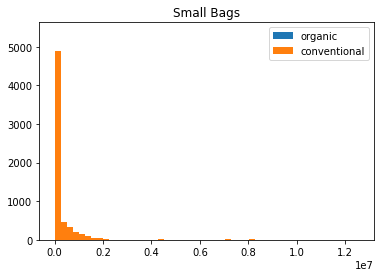

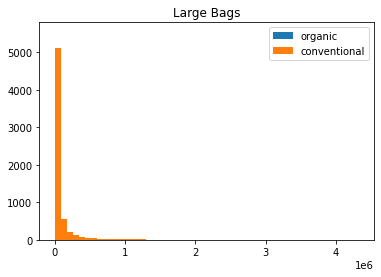

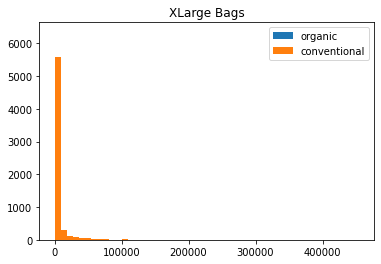

In [10]:
columns_num = ["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"]

for col in columns_num:
    plt.hist(d_train_organic[col], bins=50, label="organic")
    plt.hist(d_train_conventional[col], bins=50, label="conventional")
    plt.legend()
    plt.title(col)
    plt.show() # forループの一回毎に表示するため，showが必要

横軸のスケールが非常に大きいですが，0付近のビンが非常に大きい値となっていて，大きい値に対応するビンはほとんど見えません．
そのため，「各サイズ（およびその袋）において，少数の観測値が非常に大きな値を取っていて，ほとんどの観測値は（その非常に大きな値と比べると）小さい」ということがわかります．
また，"organic"の結果がほとんど見えません．
見えないことからも，だいたい同じ傾向なのではないかと思いますが，グラフを分けて表示してみます．
この際に，2つのヒストグラムが縦に並んでしまうと見にくいため，横に並べて表示します．
`subplot`を使うことで簡単にできます．

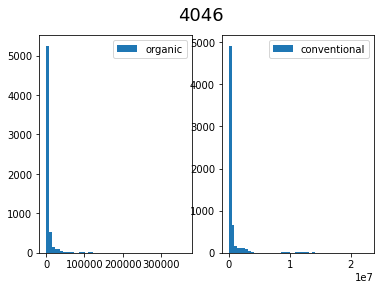

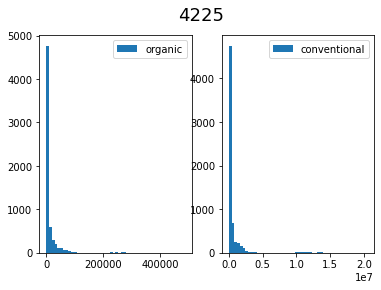

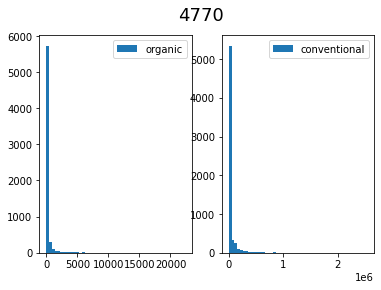

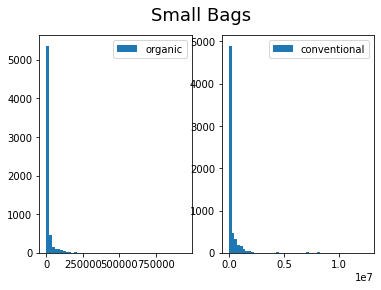

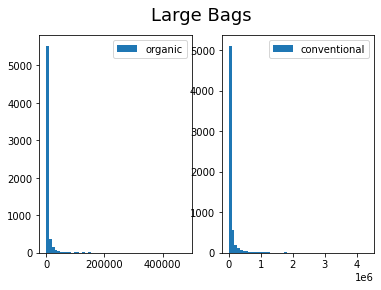

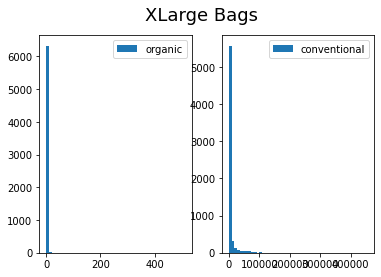

In [11]:
for col in columns_num:
    plt.suptitle(col, fontsize=18) # 全体のタイトル
    plt.subplot(121) # 1行2列の1つめ
    plt.hist(d_train_organic[col], bins=50, label="organic")
    plt.legend()

    plt.subplot(122) # 1行2列の2つめ
    plt.hist(d_train_conventional[col], bins=50, label="conventional")
    plt.legend()
    plt.show()

やはり"organic"と"conventional"は大体同じ結果になっていますね．
ただ，"XLarge Bags"について，"organic"は横幅のスケールが非常に狭く，ほとんどが0のビンにはいっていることから，"organic"においては，"XLarge Bags"として売れたものがそもそも非常に少ないということがわかります．
そもそも，"XLarge Bags"としてはほとんどの販売されていないのかもしれません．

さて，先程も述べましたが，横幅のスケールが非常に大きいが，ほとんどが0のビンに入っている為，ヒストグラムが非常に見にくくなっています．
スケールの問題というと，前回の`MLPRegressor`が上手く学習できなかったことを思い出し，`MinMaxScaling`をすれば良いのではと考えるかもしれません．
しかし，`MinMaxScaling`は，単に平行移動した後に定数倍するだけですので，横軸の値は変わりますが，ヒストグラム自体の形状は変わりません．
試しにやってみましょう．
`MinMaxScaling`を使っても良いですが，ここでは使わずにやってみます：最小値を引いた後，"最大値-最小値"で割ることで`MinMaxSvaling`が可能です．

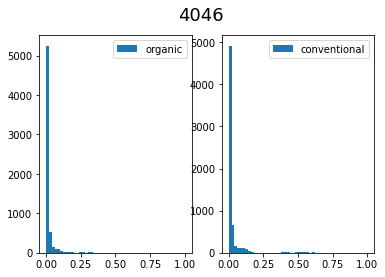

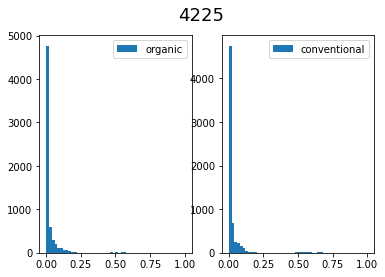

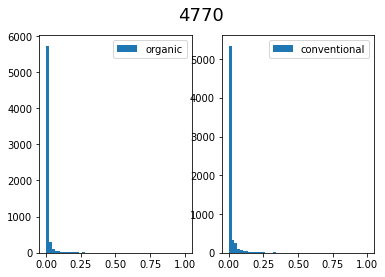

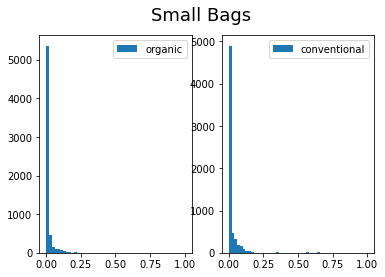

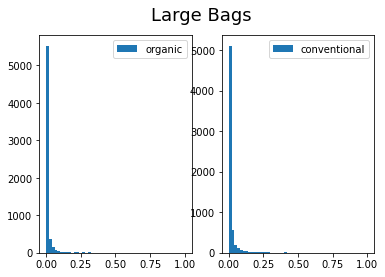

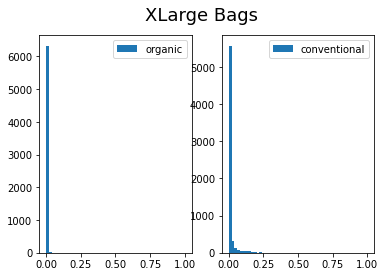

In [12]:
for col in columns_num:
    plt.suptitle(col, fontsize=18) # 全体のタイトル
    plt.subplot(121) # 1行2列の1つめ
    scaled = d_train_organic[col] - d_train_organic[col].min() # 平行移動して最小値を0にする
    scaled /= (d_train_organic[col].max() - d_train_organic[col].min()) # 最大値-最初値で割って[0, 1]にスケーリング
    plt.hist(scaled, bins=50, label="organic")
    plt.legend()

    plt.subplot(122) # 1行2列の2つめ
    scaled = d_train_conventional[col] - d_train_conventional[col].min()
    scaled /= (d_train_conventional[col].max() - d_train_conventional[col].min())

    plt.hist(scaled, bins=50, label="conventional")
    plt.legend()
    plt.show()

やはり変わりませんね．

ヒストグラムがひどく偏っているため，このままでは細かい傾向を掴むことができません．
また，前回は`MinMaxScaling`をすることで上手く学習できない問題を防ぎましたが，`MinMaxScaling`は平行移動と定数倍をするだけで，上で見たように「特定の値（区間，領域）にデータが偏っていること」は解消できません（区間の位置がずれるだけで，定義域全体に対するその区間の占める割合は変わらない）．
定義域の中で，ある狭い特定の領域（区間）にデータが偏っている場合，（区間全体の広さに対する）僅かな変化で様々なデータに対して予測を行う（＝僅かな特徴の値の変化で予測を変化させる）必要があります．
これは中々に学習が大変そうに思えるので，どうにかして解消したいです．

このように，少数のデータが非常に大きな値を取っているが大多数のデータは（その非常に大きな値と比べて）小さな値となっている，言い換えると，広い（正の）定義域に対して0に近い小さな領域にデータが偏っている場合，**対数変換**が有効なことがあります．
対数は，データサイエンスの授業では，**積を和に変換するウルトラスーパー便利な道具**としての印象が強いかもしれませんが，対数のグラフを思い出してみましょう．
$\log x$は単調増加な関数ですが，$x$の値が大きくなればなるほど増加の仕方が小さくなっていきますね．
このことを踏まえて，対数によって0に近い区間と0から離れた区間がどのように写されるかを考えてみましょう．
例を上げます．$\log$（底は何でも良いですが，ここでは自然対数を考えましょう）によって，区間$(0, 1]$は$(-\infty, 0]$に写され，一方で$[10^3, 10^{10}]$は，だいたい$[6.9, 23]$に写されます．
つまり，**対数は0に近い小さな値の区間を拡大して，0から離れた値の大きい区間を縮小**させます．
したがって，ほとんどのデータは値が小さいが，少数のデータが非常に大きな値を取っているせいで，ヒストグラムが非常に偏っている特徴量に対して$\log$を噛ませると，偏りの問題が解決し，ヒストグラムからより細かい傾向を掴むことが可能になったり，対数変換後の特徴量が予測に役立つことがあります．

では実際にやってみましょう．
この際に問題となるのが，特徴量の値が0のデータが含まれていることです（$\log x$の定義域は$x > 0$）．
ここではとりあえず，全てのデータに1を足してそれに対数を噛ませてみます．
以下のようになります．

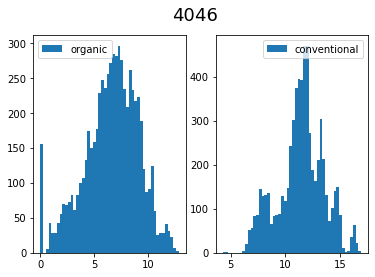

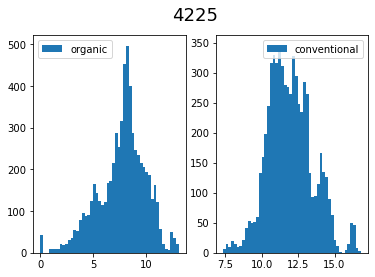

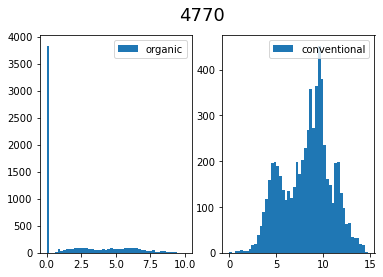

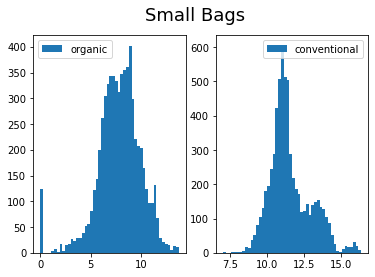

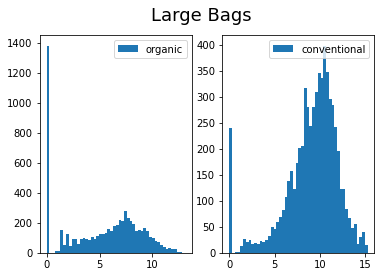

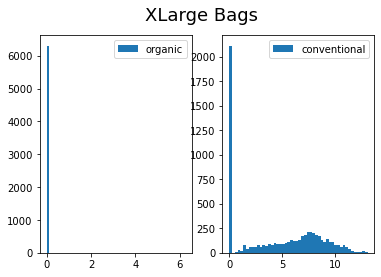

In [12]:
for col in columns_num:
    plt.suptitle(col, fontsize=18) # 全体のタイトル
    plt.subplot(121)
    plt.hist(np.log(1.0+d_train_organic[col]), bins=50, label="organic") # 表示する直前に対数を噛ませる
    plt.legend()

    plt.subplot(122)
    plt.hist(np.log(1.0+d_train_conventional[col]), bins=50, label="conventional")
    plt.legend()
    plt.show()

対数を取ることでヒストグラムの形状が大きく変わりました！
先程までは横軸のスケールが非常に大きく，ほとんどの値が0付近のビンに入っているように見え，またorganicとconventionalに大きな違いは見られませんでしたが，対数を取ることで違いがよりわかりやすくなっています．
特にorganicのアボカドでは，特大のサイズとして売れたものがconventionalと比べてかなり少ないことがすぐにわかります．

それでは，この6つの特徴量に対して，対数を取った特徴ベクトルを使って学習してみましょう．
最初の方で作成した関数，`day3_onehot_encoding`を用いてまずこれまでと同じ特徴ベクトルを作ります．
その後，この6つの特徴量に対して対数を噛ませましょう．
この6つの特徴量は，`X_train`において先頭の（左から数えて）6つの列に対応します．
したがって，以下のようになります．

In [13]:
X_train, X_test, y_train = day3_onehot_encoding(d_train, d_test)
X_train[:, :6] = np.log(X_train[:, :6]+1.0) # X_train[:, :6]：「全ての行（＝データ点）の左から6番目までの列（＝特徴）」
X_test[:, :6] = np.log(X_test[:, :6]+1.0)

前回と同様に，`MLPRegressor`+`GridSearchCV`を動かしてみます．

In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
mlp = MLPRegressor(max_iter=100, random_state=765) # ここを埋める
params_grid = {
    "hidden_layer_sizes": [(100, ), (80, 80)],
    "activation": ["logistic", "tanh", "relu"],} # ここを埋める
# 以下を埋める
cv = GridSearchCV(mlp, param_grid=params_grid, cv=5, 
                  scoring="neg_mean_squared_error") # 
cv.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100, random_state=765),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (80, 80)]},
             scoring='neg_mean_squared_error')

結果を確認してみましょう．
最も良いハイパーパラメータの組合せは`best_params_`で，その結果のスコアは`best_score_`でアクセスができるのでした．

In [15]:
print(cv.best_params_)
print(-cv.best_score_)

{'activation': 'tanh', 'hidden_layer_sizes': (80, 80)}
0.019731246482268965


前回の結果と比較するとスコアが良くなっているように見えますね．
このモデルを用いて予測を行い，その結果を投稿してみても良いかもしれません．
予測を行う際には，`X_test`についてもスケーリングを施すことを忘れずに．

In [16]:
X_test_scaled = scaler.transform(X_test)
y_pred = cv.predict(X_test_scaled)
np.savetxt("y_pred_mlp_logtransform.txt", y_pred)

## チューニング結果を可視化する（1次元の場合）

これまではデータそのものに関する可視化を行ってきました．
可視化はデータそのものだけでなく，**ハイパーパラメータのチューニングの際にも役に立ちます**．

今回は`SVR`というモデルを動かしてみます．
`SVR`はSupport Vector Regressionの頭文字で，（もう授業でやりましたでしょうか？）サポートベクトルマシン（Support Vector Machine）の回帰版です．
sklearnでは，`sklearn.svm`のモジュールに含まれているので，以下のようにしてインポートすることが可能です．

In [17]:
from sklearn.svm import SVR

[SVRのドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)を見てみます．
簡単にハイパーパラメータについて説明します．
- `kernel`：文字列，カーネル関数．これをきちんと説明すると骨が折れるため詳しくはしませんが，`SVR`では最も重要なパラメータの一つで，とりあえずここでは`MLPRegressor`における活性化関数のようなものだと思っていただければ良いでしょう．"linear"，"rbf", "poly"，"sigmoid"，"precomputed"を指定できます．"precomputed"は，自分で設計したカーネル関数を用いる場合に使うもので，`fit`や`predict`の使い方も少し変わるため，よほど頑張りたい人以外は使わないほうが良いでしょう．デフォルトは"rbf"．
- `C`：float，正則化項の強さの逆数（＝`Ridge`等における`alpha`の逆数）．デフォルトは1.0．
- `epsilon`：非負のfloat，`SVR`における損失関数，$\epsilon$-許容誤差　$\max (0, |(y_i - y(\mathbf{x}_i)|-\epsilon)$　のパラメータ$\epsilon$．SVRでは，二乗誤差ではなく絶対誤差を損失関数とし，さらに，誤差の値が$\epsilon$以下である場合は誤差を0とする（無視する）．デフォルトは0.1．

他にも，カーネル関数毎にハイパーパラメータが存在します．
例えば，
- `gamma`：非負のfloat or 文字列，スケーリングに関わる係数．`rbf`と`poly`，`sigmoid`の時に使われる．

せっかくSVRを使っていますが，今回は，`kernel="rbf"`，`epsilon=0.1`, `C=1.0`として，`gamma`を調整してみます．
とりあえず，かなり荒いですが，`gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]`として，この範囲で探索してみます．

また，少し話題が変わってしまいますが，訓練データとテストデータの行列を，学習前に`np.array`から`scipy.sparse`の`csr_matrix`に変換します．
`csr_matrix`は，**スパースマトリクス**と呼ばれる，疎な（0が多い）行列を効率よく表現するデータ構造です．
（ノードとエッジの集合の意味での）グラフにおいて，隣接リストを用いるとエッジの数が少ないグラフは効率よく（＝少ないメモリで）表現できたかと思いますが，そのようなイメージを持てば良いかもしれません．
スパースマトリクスを用いることにより，学習や予測を非常に効率よく行うことができる場合があり，今回の特徴ベクトルは，one-hotエンコーディングを行っているため0の割合がかなり多くスパースマトリクスを用いるのに適しています．
詳しく知りたい方は，2019年度の資料を参考にしてみてください．

以下のように`csr_matrix`を`import`し，この関数に`np.array`を渡すと，スパースマトリクスに変換したものを返してくれます．

In [18]:
from scipy.sparse import csr_matrix
X_train_scaled_sparse = csr_matrix(X_train_scaled)
X_test_scaled_sparse = csr_matrix(X_test_scaled)

では，`X_train_scaled`の代わりに，この`X_train_scaled_sparse`を用いて学習してみましょう．
結果は`X_train`を用いた場合と変わりませんが，学習時間がかなり速くなるはずです．
興味がある方は，`X_train_scaled`を用いて同様の学習を行ってみると良いかもしれません．
セルの最初に
%%time
とつけることで，セル全体の実行時間の計測が可能です．

In [19]:
%%time
svr = SVR(C=1, cache_size=500)
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

params_grid = {"gamma": gammas}
cv = GridSearchCV(svr, param_grid=params_grid, cv=5, 
                  scoring="neg_mean_squared_error")
cv.fit(X_train_scaled_sparse, y_train)

CPU times: user 2min 24s, sys: 2.99 s, total: 2min 27s
Wall time: 2min 28s


GridSearchCV(cv=5, estimator=SVR(C=1, cache_size=500),
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

では，`gamma`を変化させるとスコアがどのように変化するかが気になりますね．
グリッドサーチ交差検証の結果について，`cv_results_`という辞書型の変数が様々な情報を持っています．
この辞書型の変数の中で，"mean_test_score"というキーを用いることで，各ハイパーパラメータにおける交差検証のスコアにアクセスできます．

In [20]:
print(-cv.cv_results_["mean_test_score"])

[0.09574462 0.06716387 0.04770616 0.03542434 0.03885519 0.16266239
 0.16266241]


でてきましたね．
しかし，各スコアがどのハイパーパラメータの結果に対応するのかがわかりません．
この対応関係については，"params"というキーで調べることができます．
このキーは，「"ハイパーパラメータの組合せの辞書"の配列（リスト）」を持っています．
この配列の長さは"mean_test_score"のキーで得られる配列と同じで，対応関係があります（分かりにくいですが一応言語化すると，「"params_"のキーで得られる配列の，i番目の要素のハイパーパラメータの組合せのときの交差検証スコア」が，「"mean_test_score"で得られる配列のi番目の要素の値」です）．

In [21]:
print(cv.cv_results_["params"])

[{'gamma': 0.0001}, {'gamma': 0.001}, {'gamma': 0.01}, {'gamma': 0.1}, {'gamma': 1}, {'gamma': 10}, {'gamma': 100}]


つまり，先程のスコアは，左から順に`gamma=0.0001, gamma=0.001,` ..., `gamma=100`のスコアということになります．
ちょっと数字だけを見ていてもわかりにくいため，横軸を`gamma`，縦軸を（負の）スコアとした折れ線グラフを作ってみましょう．

### Quiz2
横軸を`gamma`，縦軸を負の交差検証のスコア（平均二乗誤差）として，`GridSeachCV`の結果を折れ線グラフで表示してください．
ただし，以下を行うこと：
- x軸は対数スケールとする
- x軸には"gamma"というラベルをつける
- y軸には"Mean Squared Error"というラベルをつける

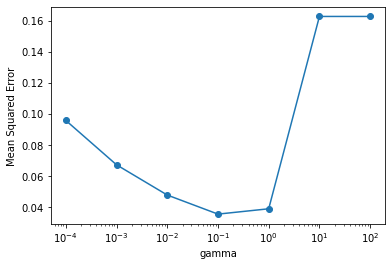

In [22]:
# 以下を埋めること




plt.show()

非常にわかりやすくなりました．
`gamma=0.1`の結果が一番良さそうです．
今回は探索範囲がかなり粗かったので，このグラフを形状を考慮して，次は`0.01`から`1.0`の範囲でもう少し細かく探索してみると，より良いモデルが見つけられるかもしれません．

## チューニング結果を可視化する（2次元の場合）
`gamma`は`0.1`の周辺が良さそうだ，ということがわかりました．
しかし，ハイパーパラメータが複数あるのに対してまだ一つしか動かしていません．
そこで今度は`C`も動かしてみます．
本来，`C`の値が変われば適切な`gamma`の値も変わる気がしますが，上の結果を参考に，`gamma`の探索範囲は

`gammas = [0.04, 0.08, 0.16, 0.32, 0.64]`

とし，`C`の探索範囲は

Cs = [1e-2, 1e-1, 1, 10, 100]

としてみます．

In [23]:
Cs = [1e-2, 1e-1, 1, 10, 100]
gammas = [0.04, 0.08, 0.16, 0.32, 0.64]
params_grid = {"gamma": gammas, "C": Cs}
cv = GridSearchCV(svr, param_grid=params_grid, cv=5, 
                  scoring="neg_mean_squared_error")
cv.fit(X_train_scaled_sparse, y_train)
print(-cv.cv_results_["mean_test_score"])
print(cv.cv_results_["params"])

[0.08127365 0.07356072 0.06726618 0.06514615 0.07235973 0.05207655
 0.04633761 0.04253844 0.04066278 0.04259507 0.04019947 0.03672518
 0.03251303 0.03030592 0.03312276 0.03234344 0.02877325 0.02839175
 0.02929205 0.03302416 0.02885704 0.02852838 0.0283891  0.02929205
 0.03302416]
[{'C': 0.01, 'gamma': 0.04}, {'C': 0.01, 'gamma': 0.08}, {'C': 0.01, 'gamma': 0.16}, {'C': 0.01, 'gamma': 0.32}, {'C': 0.01, 'gamma': 0.64}, {'C': 0.1, 'gamma': 0.04}, {'C': 0.1, 'gamma': 0.08}, {'C': 0.1, 'gamma': 0.16}, {'C': 0.1, 'gamma': 0.32}, {'C': 0.1, 'gamma': 0.64}, {'C': 1, 'gamma': 0.04}, {'C': 1, 'gamma': 0.08}, {'C': 1, 'gamma': 0.16}, {'C': 1, 'gamma': 0.32}, {'C': 1, 'gamma': 0.64}, {'C': 10, 'gamma': 0.04}, {'C': 10, 'gamma': 0.08}, {'C': 10, 'gamma': 0.16}, {'C': 10, 'gamma': 0.32}, {'C': 10, 'gamma': 0.64}, {'C': 100, 'gamma': 0.04}, {'C': 100, 'gamma': 0.08}, {'C': 100, 'gamma': 0.16}, {'C': 100, 'gamma': 0.32}, {'C': 100, 'gamma': 0.64}]


"params"を見ると，`gamma`を動かしてから`C`を動かしていることがわかります．
したがって，`cv.cv_results_["mean_test_score"]`を，`(len(Cs),len(gammas))`に`reshape`すると，各行がある`C`での結果に対応し，各列がある`gamma`での結果に対応するような二次元配列が得られます（今回のケースでは，例えば，0行目が`C=0.01`の結果に対応し，0列目が`gamma=0.04`の結果に対応するため，[0, 0]には0.08127365が格納されている二次元配列）．
以下のようになります．

In [24]:
scores = -cv.cv_results_["mean_test_score"].reshape(len(Cs), len(gammas))

では，この結果を可視化してみましょう．
ここでは，このスコアを色として表した，**ヒートマップ**を作ってみます．
以下のように`plt.imshow`に`scores`を渡すことでできます．

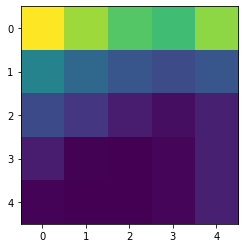

In [25]:
plt.imshow(scores)
plt.show()

結果が出てきました．
しかし，色の対応関係がこれだとよくわかりませんね．
ヒートマップの各セルに，対応するスコアをテキストで表示してみます．
`plt.text`は，x座標，y座標，そして文字列を渡すことで，対応する座標に文字列を表示してくれます．
今回は以下のように，小数点第5桁まで表示してみます．

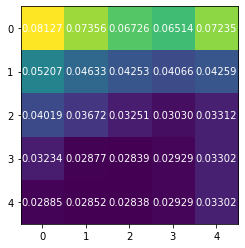

In [26]:
plt.imshow(scores)
for i in range(len(Cs)):
    for j in range(len(gammas)):
        plt.text(j, i, str(scores[i, j])[:7], color="white",
                 ha="center", va="center")

大分わかりやすくなりました！
色が暗い方が誤差が低い，すなわち色が暗いほうが良いハイパーパラメータだということになりますね．
最後に，軸の情報を修正します．
`plt.xticks`や`plt.yticks`を用いることで軸の情報を修正できます．

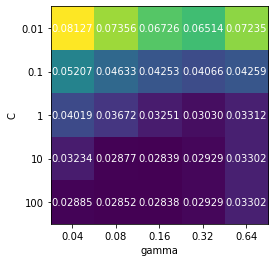

In [27]:
plt.imshow(scores)
for i in range(len(Cs)):
    for j in range(len(gammas)):
        plt.text(j, i, str(scores[i, j])[:7], color="white",
                 ha="center", va="center")
        
plt.yticks(range(len(Cs)), Cs) # y軸の0, 1, 2, 3, 4の位置に，Csの値を配置
plt.xticks(range(len(gammas)), gammas) # x軸の0, 1, 2, 3, 4の一に，gammasの値を配置
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()

非常にわかりやすくなりましたね．
今回の探索範囲においては，`C`は大きいほうがよさそうですね．
もう少し`C`の探索範囲を（大きい方に）広げてみても良いかもしれません．
`C`は`Ridge`でいうところの`alpha`の逆数に対応します．
`Ridge`の場合をもはや覚えているかは怪しいと思いますが，`Ridge`と比べると，`SVR`は`C`の変化について性能が大きく変化している印象を受けますね．

この結果を元に更に細かくチューニングしてみる，さらにチューニングするハイパーパラメータを追加するといったことをしてみると良いかもしれません．

## まとめ
- AveragePriceについて，ヒストグラムを作った．`plt.hist`で作ることができる．organicの方が値段が高い傾向があることが分かった．
- 売れた個数についてヒストグラムを作ったところ，ごく少数の観測値が非常に大きな値を取っていることがわかった．対数を噛ませたところスケールの悪さが改善され，`MLPRegressor`のスコアも改善された．
- ハイパーパラメータのチューニング結果について可視化することで，次のチューニングの計画を立てやすくなる．また，ハイパーパラメータが誤差にどのように影響するのか，どのハイパーパラメータを慎重にチューニングすべきでどのパラメータはあまりチューニングしなくてもよいのか，等もわかることがある．

今回は，matplotlibの`pyplot`の機能を使って簡単な可視化を行いました．
matplotlibには他にも様々な機能があります．
より複雑なグラフを作る場合は，`axes`や`figures`といった機能を用いるほうが良い場合も多いです．
興味がある方は調べてみると良いかもしれません．
また，matplotlib以外にものライブラリを用いるのも良いでしょう．
(Pythonライブラリ以外で）他に慣れているグラフ描画ソフトウェアがあれば，データを一度ファイルに吐き出して，そちらを使うというのも良いでしょう．

今回の資料では，データの可視化を行う際に，目標値（"AveragePrice"）やある単一の特徴量（"4046"）の出現頻度を可視化しました．
しかし，コンペティションのタスクは「特徴量から目標値を予測する」というものです．
したがって，特徴量と目標値の関係を可視化することでよりコンペティションに役立つ知見を得られるかもしれません．
また，特徴量と特徴量の関係をプロットすることも，より深い洞察を与えてくれる可能性があります．
レポートを作成する際にも，グラフの作成は役に立つと思いますので，ぜひ色々試して見てください．

### Quiz 1
`np.array`や`DataFrame`に真偽値の配列を渡すと，`True`の行だけを抽出することができることを利用する．
今，"organic"の行を取り出したいとすると，

`d_train["type"]=="organic"`

は，真偽値の配列で，`d_train`において"type"が"organic"である行には`True`が，そうでない行には`False`が入ったものを返す．
したがって，これを`d_train`に渡せば良い．
"conventional"についても同様．

In [ ]:
d_train_organic = d_train[d_train["type"]=="organic"] # ここを埋める
d_train_conventional = d_train[d_train["type"]=="conventional"] # ここを埋める

# 値段を取り出す
price_organic = d_train_organic["AveragePrice"]
price_conventional = d_train_conventional["AveragePrice"]

# ヒストグラムを作成
plt.hist(price_organic, bins=50, label="organic") # 凡例をつける
plt.hist(price_conventional, bins=50, label="conventional") # 凡例をつける
plt.legend() # 凡例を表示
plt.show() # グラフを表示

### Quiz 2
以下のようになる．
"-o"はマーカーを指定している（しなくてもよい）．
これによって，単に点が結ばれるのではなく，点の位置（最初の２つの引数で指定された座標）に"o"のマーカーがつく．
"-"とした場合はマーカーはつかず，"o"とした場合は線で結ばれない（散布図のようになる）．

In [ ]:
plt.plot(gammas, -cv.cv_results_["mean_test_score"], "-o")
plt.xscale("log")
plt.xlabel("gamma")
plt.ylabel("Mean Squared Error")
plt.show()